# Importing the Dependencies/Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import pandas_profiling
import sweetviz


# Loading the Data which is in the csv format into a Pandas DataFrame

In [4]:
url = r"C:\Users\rahul\OneDrive\Desktop\TITANIC\titanic\train.csv"

In [5]:
df = pd.read_csv(url)

In [6]:
df.head()   # Printing first 5 rows of the Dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.tail()   # Printing the last 5 rows of the Dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Summarizing the Dataset

In [8]:
df.shape   # Checking the size, number of rows and columns 

(891, 12)

In [9]:
df.info   # Checking the info of the Data

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [10]:
cols = df.columns

In [11]:
df.isnull().sum()   # Checking for total null values in each features

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Filling the Null/Missing values in the Data

In [12]:
df['Age'] = df['Age'].fillna(df['Age'].median())   # Filling the missing values of the Age column with the median value
df['Embarked'] = df['Embarked'].fillna("S")   # Filling the missing values of the Embarked column with S, as it has the most count

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
# We can remove the Cabin column as it has more than 50% values which are missing
# We can also remove some other columns with Cabin which we think are unneccessary

In [15]:
df.isnull().sum()   # Checking again for any null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [16]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [17]:
df   #Checking the modified DataFrame

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


# Descriptive Statistics

In [18]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,891.0,NaN,NaN,NaN,29.361582,13.019697,0.42,22.0,28.0,35.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
Embarked,891,3,S,646,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Plotting the DataFrame

In [20]:
sns.set_theme()

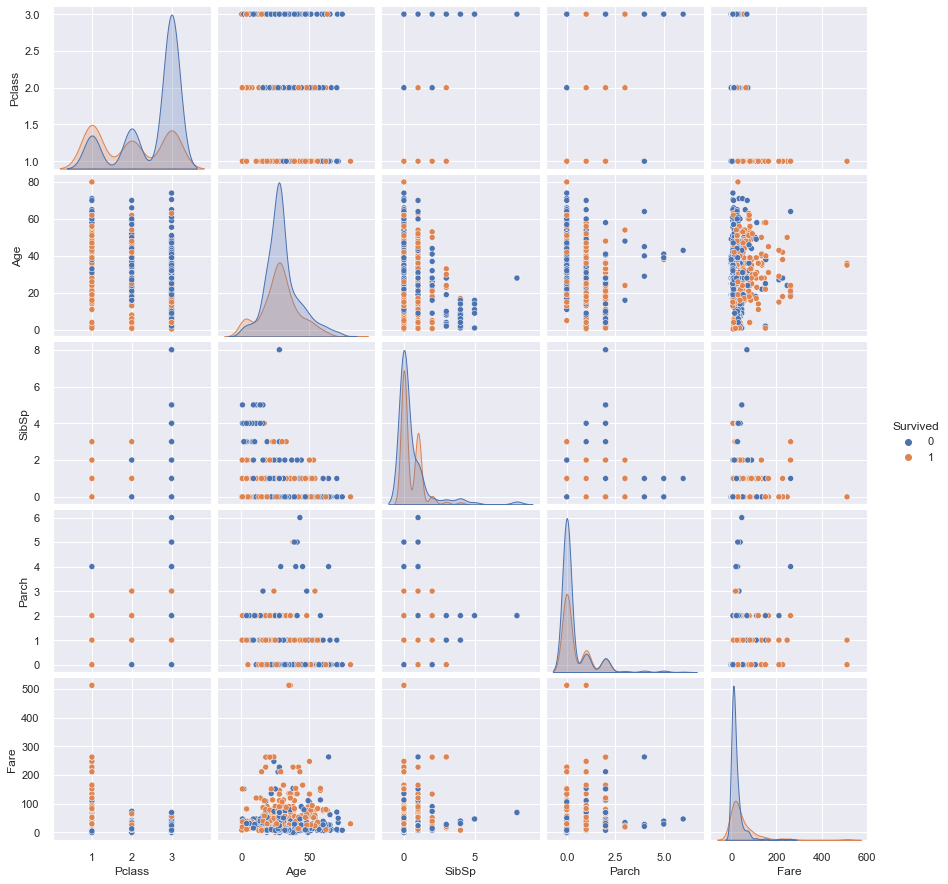

In [21]:
sns.pairplot(df, hue='Survived')

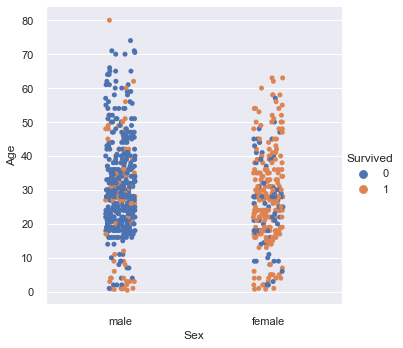

In [22]:
sns.catplot(data=df, x='Sex', y='Age', hue='Survived')

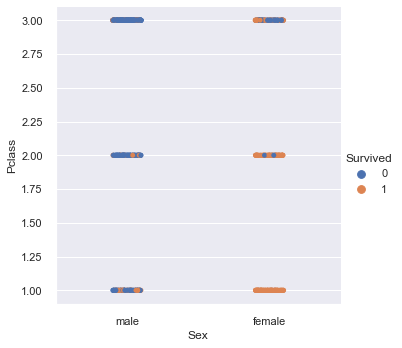

In [23]:
sns.catplot(data=df, x='Sex', y='Pclass', hue='Survived')

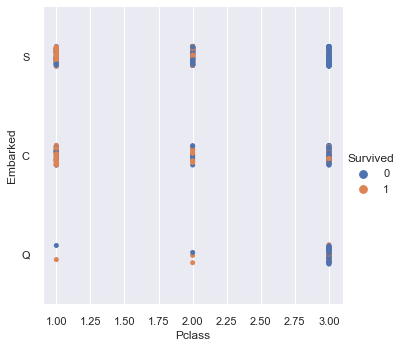

In [24]:
sns.catplot(data=df, x='Pclass', y='Embarked', hue='Survived')

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

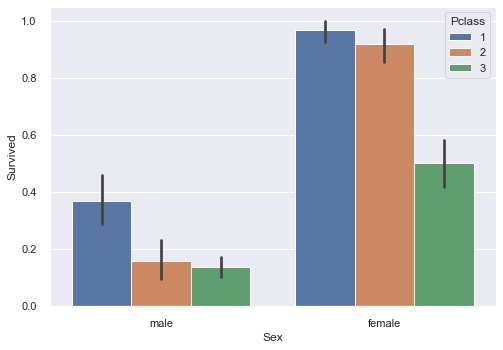

In [25]:
sns.barplot(x=df['Sex'], y=df['Survived'], data=df, hue='Pclass')

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

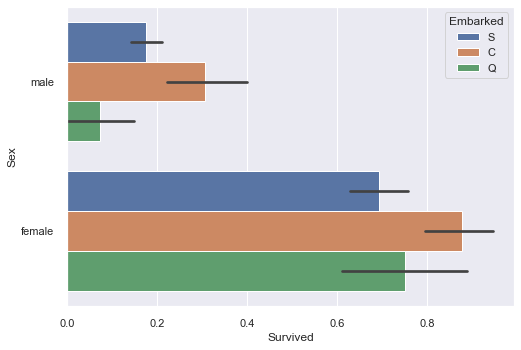

In [26]:
sns.barplot(x='Survived', y='Sex', data=df, hue='Embarked')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

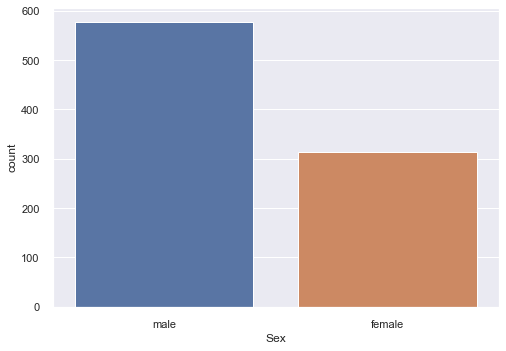

In [27]:
sns.countplot(df['Sex'], data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

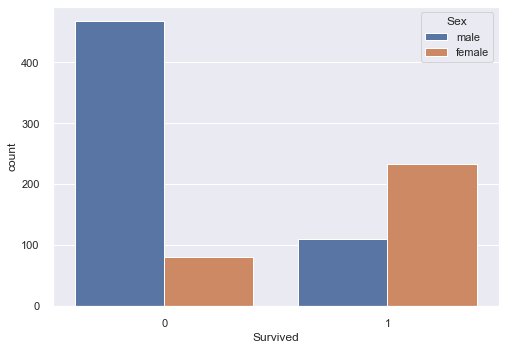

In [28]:
sns.countplot(df['Survived'], hue='Sex',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

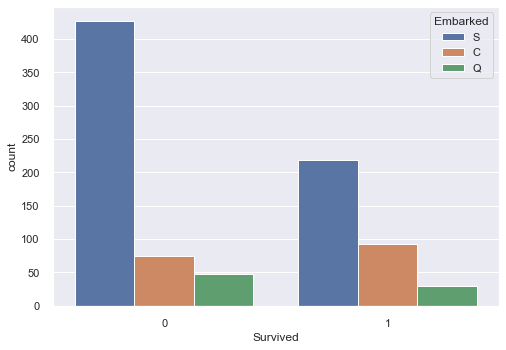

In [29]:
sns.countplot(df['Survived'], hue='Embarked',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

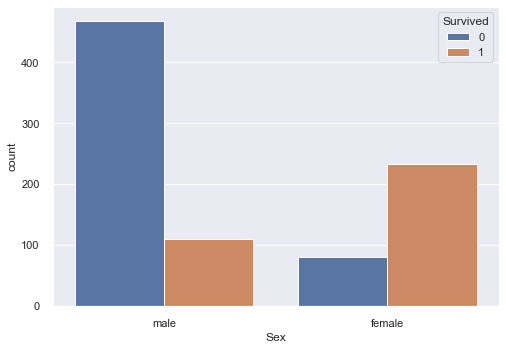

In [30]:
sns.countplot(df['Sex'], hue='Survived',data=df)

In [31]:
# We shall create a new feature called Family Size
df['Family_Size'] = df['Parch'] + df['SibSp']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

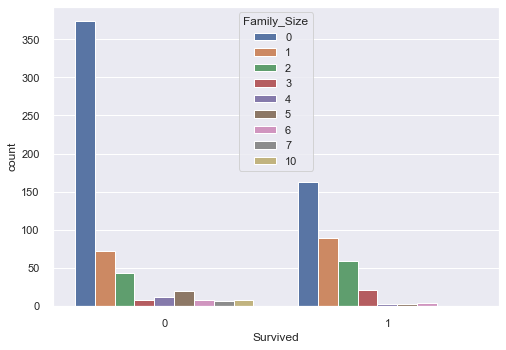

In [32]:
sns.countplot(df['Survived'], hue='Family_Size',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Family_Size'>

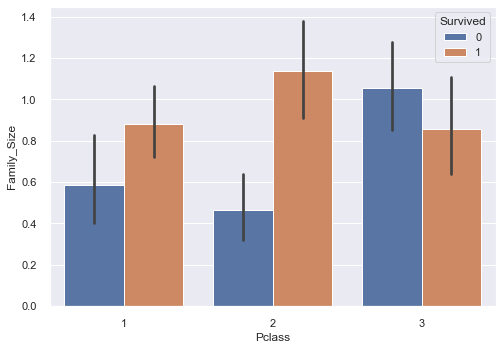

In [33]:
sns.barplot(x='Pclass', y='Family_Size', data=df, hue='Survived')

In [42]:
# We will generate EDA with pandas-profiling
from pandas_profiling import ProfileReport
import visions
report_titanic = ProfileReport(df)

ImportError: cannot import name 'ABCIndexClass' from 'pandas.core.dtypes.generic' (C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\dtypes\generic.py)

In [39]:
report_titanic

NameError: name 'report_titanic' is not defined

In [37]:
!pip install pandas-profiling==2.7.1 

Defaulting to user installation because normal site-packages is not writeable


In [40]:
!pip install visions

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
report_titanic.to_widgets()

In [ ]:
json_data = report_titanic.to_json()

In [ ]:
report_titanic.to_file(output_file="Titanic.html")

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.ensemble import RandomForestRegressor
from hyperopt import tpe,hp,Trials
from hyperopt.fmin import fmin
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install xgboost

# Segregating data into X & Y

In [44]:
X = df.drop(columns=['Survived'], axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size
0,3,male,22.0,1,0,7.2500,S,1
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,0
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,0
888,3,female,28.0,1,2,23.4500,S,3
889,1,male,26.0,0,0,30.0000,C,0


In [45]:
y = df['Survived']

In [46]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Splitting the Data into Train & Test

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0)

# Feature Scaling

1. We scale scale our data to make all the features contribute equally to the result
2. Fit_Transform - Fit method is calculating the mean & variance of each of the features present in our data
3. Transform - Transform method is transforming all the features using their respective mean & variance 

We want our test data to be completely new and a surprise set for our model 

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [48]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch', 'Family_Size']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                   one_hot,
                                   categorical_features)],
                                   remainder='passthrough')

transformed_X = transformer.fit_transform(X)

In [49]:
transformed_X

<891x33 sparse matrix of type '<class 'numpy.float64'>'
	with 7113 stored elements in Compressed Sparse Row format>

In [50]:
pd.DataFrame(transformed_X)

,0
0,"(0, 2)\t1.0\n (0, 4)\t1.0\n (0, 7)\t1.0\n ..."
1,"(0, 0)\t1.0\n (0, 3)\t1.0\n (0, 5)\t1.0\n ..."
2,"(0, 2)\t1.0\n (0, 3)\t1.0\n (0, 7)\t1.0\n ..."
3,"(0, 0)\t1.0\n (0, 3)\t1.0\n (0, 7)\t1.0\n ..."
4,"(0, 2)\t1.0\n (0, 4)\t1.0\n (0, 7)\t1.0\n ..."
...,...
886,"(0, 1)\t1.0\n (0, 4)\t1.0\n (0, 7)\t1.0\n ..."
887,"(0, 0)\t1.0\n (0, 3)\t1.0\n (0, 7)\t1.0\n ..."
888,"(0, 2)\t1.0\n (0, 3)\t1.0\n (0, 7)\t1.0\n ..."
889,"(0, 0)\t1.0\n (0, 4)\t1.0\n (0, 5)\t1.0\n ..."


In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)

In [52]:
# Let's refit our model

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0)
model.fit(X_train,y_train)

LogisticRegression(random_state=0)

# Prediction for all Test Datael

In [53]:
model.score(X_test,y_test)

0.8071748878923767

In [54]:
model.score(X_train,y_train)

0.8218562874251497

In [55]:
y_pred = model.predict(X_test)

In [56]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [57]:
len(y_pred)

223

In [58]:
len(y_test), len(y_pred)

(223, 223)

# Model Evaluation - Confusion Matrix

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test,y_pred)*100))

Confusion Matrix: 
[[119  20]
 [ 23  61]]
Accuracy of the Model: 80.71748878923766%


In [61]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['Predicted No', 'Predicted Yes'], index=['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,119,20
Actual Yes,23,61


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       139
           1       0.75      0.73      0.74        84

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223



# Using with Hyperopt-sklearn

In [84]:
from hpsklearn import HyperoptEstimator, any_classifier, any_preprocessing
from hpsklearn import HyperoptEstimator, extra_tree_classifier

if __name__ == "__main__":
    # Instantiate a HyperoptEstimator with the search space and number of evaluations
    estim = HyperoptEstimator(classifier=any_classifier("my_clf"),
                              preprocessing=any_preprocessing("my_pre"),
                              algo=tpe.suggest,
                              max_evals=100,
                              trial_timeout=120)

In [86]:
if __name__ == "__main__":
    # Instantiate a HyperoptEstimator with the search space and number of evaluations
    estim = HyperoptEstimator(classifier=extra_tree_classifier("my_clf"),
                              preprocessing=[],
                              algo=tpe.suggest,
                              max_evals=10,
                              trial_timeout=300)


In [87]:
estim.fit(X_train, y_train)

100%|██████████| 10/10 [00:04<00:00,  4.09s/trial, best loss: 0.20149253731343286]


In [88]:
print(estim.score(X_test, y_test))

0.820627802690583


In [89]:
    print(estim.best_model())

{'learner': ExtraTreeClassifier(max_depth=4, max_features=0.7365652587206992,
                    random_state=2), 'preprocs': (), 'ex_preprocs': ()}


In [95]:
acc = estim.score(X_test, y_test)

In [97]:
print("Accuracy: %.11f" % acc)

Accuracy: 0.82062780269
